In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("international-airline-passengers.csv", usecols=[1])
df.shape

(144, 1)

In [3]:
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [4]:
values = df.values.astype('float32')

In [5]:
train_size = int((values.shape[0] * .67)) # using 2/3 of data as training
test_size = values.shape[0] - train_size
train_size, test_size

(96, 48)

In [6]:
train = values[:train_size]
test = values[train_size:]
train.shape, test.shape

((96, 1), (48, 1))

In [7]:
# scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [8]:
train = scaler.fit_transform(train)
test = scaler.transform(test)
train, test

(array([[0.02588999],
        [0.04530746],
        [0.09061491],
        [0.08090615],
        [0.05501619],
        [0.10032365],
        [0.14239484],
        [0.14239484],
        [0.10355988],
        [0.04854369],
        [0.        ],
        [0.04530746],
        [0.03559873],
        [0.07119742],
        [0.11974111],
        [0.10032365],
        [0.06796119],
        [0.14563107],
        [0.21359226],
        [0.21359226],
        [0.17475727],
        [0.09385115],
        [0.03236246],
        [0.11650488],
        [0.13268611],
        [0.14886734],
        [0.2394822 ],
        [0.1909385 ],
        [0.22006473],
        [0.2394822 ],
        [0.3074434 ],
        [0.3074434 ],
        [0.25889972],
        [0.18770227],
        [0.13592234],
        [0.20064726],
        [0.2168285 ],
        [0.24595472],
        [0.2880259 ],
        [0.24919096],
        [0.25566342],
        [0.36893204],
        [0.40776703],
        [0.44660196],
        [0.33980587],
        [0

In [9]:
# k = look_back
def create_dataset(data, k): 
    dataX, dataY = [], []
    for i in range(data.shape[0] - k):
        x = data[i:i+k, 0]
        y = data[i+k, 0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [10]:
look_back = 12
train_x, train_y = create_dataset(train, look_back)
test_x, test_y = create_dataset(test, look_back)
# 96 - 12
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((84, 12), (84,), (36, 12), (36,))

In [11]:
# reshape the data since RNN requires 3D data 
train_x = np.reshape(train_x, ((train_x.shape[0], train_x.shape[1], 1)))
test_x = np.reshape(test_x, ((test_x.shape[0], test_x.shape[1], 1)))
train_x.shape, test_x.shape

((84, 12, 1), (36, 12, 1))

In [12]:
# set up the RNN model
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

C:\Users\hp\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [13]:
# defining model
model = Sequential()

In [14]:
# add RNN layer
model.add(SimpleRNN(4, input_shape = (look_back, 1))) # number of units and shape of input as parameters

In [15]:
# add dense layer with 1 unit
model.add(Dense(1))

In [16]:
# compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [17]:
# summarizing the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 4)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


In [18]:
# fitting the model
model.fit(train_x, train_y, epochs = 100, batch_size=1)

Epoch 1/100
84/84 [==============================] - 1s 9ms/step - loss: 0.7641
Epoch 2/100
84/84 [==============================] - 0s 3ms/step - loss: 0.2717
Epoch 3/100
84/84 [==============================] - 0s 3ms/step - loss: 0.1317
Epoch 4/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0886
Epoch 5/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0603
Epoch 6/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0405
Epoch 7/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0301
Epoch 8/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0251
Epoch 9/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0221
Epoch 10/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0198
Epoch 11/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0177
Epoch 12/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0157
Epoch 13/100
84/84 [=================

In [19]:
# analysing the output
test_predict = model.predict(test_x)
test_predict = scaler.inverse_transform(test_predict).ravel() # convert data to 1D
test_predict

array([394.06427, 356.58835, 357.57208, 336.4838 , 416.37546, 429.17813,
       437.8933 , 430.17267, 426.4379 , 378.18484, 334.11548, 338.65826,
       395.76276, 397.59872, 362.8356 , 347.38293, 433.12274, 447.72955,
       450.7052 , 438.83487, 446.77124, 398.9122 , 347.91345, 336.00955,
       405.799  , 426.02914, 379.84387, 345.16348, 410.4239 , 468.22607,
       463.20987, 448.03012, 455.55307, 419.56137, 382.9761 , 353.85944],
      dtype=float32)

In [20]:
train_predict = model.predict(train_x)
train_predict = scaler.inverse_transform(train_predict).ravel() # convert data to 1D
train_predict

array([121.963585, 138.55186 , 139.4627  , 130.92148 , 135.22318 ,
       146.9398  , 161.11586 , 171.53111 , 166.64468 , 152.71878 ,
       133.84897 , 116.705795, 137.7913  , 160.16827 , 161.19469 ,
       146.69649 , 151.57315 , 174.02957 , 197.79874 , 206.60199 ,
       192.74655 , 169.09691 , 156.53888 , 150.46518 , 163.33559 ,
       185.14256 , 203.54642 , 183.46034 , 186.64313 , 199.12317 ,
       222.62993 , 235.04147 , 222.4404  , 206.41483 , 182.47755 ,
       183.79364 , 200.31728 , 216.09814 , 216.20042 , 203.20636 ,
       206.23244 , 248.05339 , 247.36375 , 268.3464  , 242.03835 ,
       237.23453 , 218.2696  , 208.50194 , 214.4472  , 219.00175 ,
       258.08932 , 243.71396 , 240.03696 , 274.98203 , 288.36823 ,
       304.47458 , 266.11646 , 248.3663  , 230.14731 , 217.78923 ,
       244.72984 , 221.99591 , 264.74286 , 239.89708 , 252.56499 ,
       293.25122 , 348.07507 , 339.34464 , 295.7367  , 268.04602 ,
       247.5282  , 244.05145 , 292.40958 , 262.34662 , 301.837

In [21]:
test_true = scaler.inverse_transform([test_y]).ravel()
train_true = scaler.inverse_transform([train_y]).ravel()
test_true, train_true

(array([340.0000141 , 318.00002115, 362.00000705, 348.00002158,
        363.0000218 , 435.00001547, 490.99999417, 505.00001648,
        404.00000029, 358.99999964, 310.00001367, 337.00000669,
        360.00001439, 342.00000676, 405.99999295, 395.99999281,
        420.00001525, 472.00000863, 548.00002446, 559.00000252,
        463.00002324, 407.0000077 , 362.00000705, 405.00001504,
        417.00000784, 390.99999273, 419.0000005 , 460.99999374,
        472.00000863, 535.00001691, 621.99997396, 605.99999583,
        508.00002389, 460.99999374, 390.00001482, 432.00000806]),
 array([115.00000165, 125.99999813, 140.99999835, 135.00000194,
        125.0000018 , 148.99999662, 170.00000245, 170.00000245,
        157.99999122, 133.00000007, 113.99999611, 140.00000201,
        145.00000209, 150.00000216, 177.99999151, 162.99999129,
        171.99999511, 177.99999151, 199.00000655, 199.00000655,
        184.00000633, 161.99999496, 145.99999842, 165.9999987 ,
        170.99999878, 180.00000259, 19

In [22]:
# plotting the points
from matplotlib import pyplot as plt

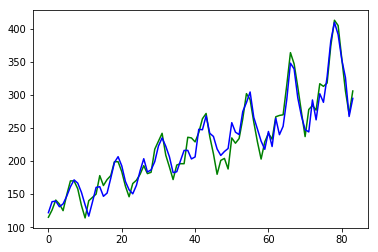

In [23]:
plt.plot(train_true, c='g')
plt.plot(train_predict, c='b')
plt.show()

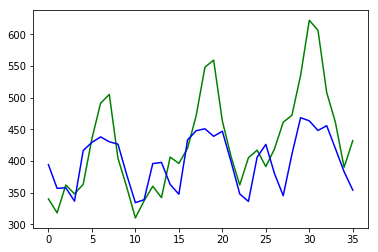

In [24]:
plt.plot(test_true, c='g')
plt.plot(test_predict, c='b')
plt.show()

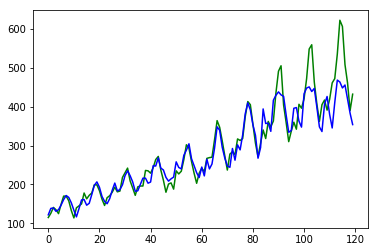

In [26]:
# combined data
combined_pred = np.concatenate((train_predict, test_predict))
combined_true = np.concatenate((train_true, test_true))
plt.plot(combined_true, c='g')
plt.plot(combined_pred, c='b') 
plt.show()